Group 5:

2702235696 - Filbert Naldo Wijaya

2702236181 - Bernard Santosa

2702287200 - Christian Sadikin

In [ ]:
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data = pd.read_csv(r'Coursera.csv')

In [ ]:
data

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...


# Exploratory Data Analysis (EDA)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load data
data = pd.read_csv('Coursera.csv')
data.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


Jumlah data pada file csv memiliki nilai yang lengkap baik di semua kolom, jadi tidak perlu menambahkan nilai (fill missing value) pada kolom di dataset.

In [ ]:
data.describe(include='all')

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
count,3522,3522,3522,3522,3522,3522,3522
unique,3416,184,5,31,3424,3397,3424
top,Google Cloud Platform Fundamentals: Core Infra...,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...
freq,8,562,1444,740,8,8,8


Dari sini kita bisa simpulkan :

- Nilai Unik dari tiap kolom tidak sama dengan total seluruh kolom yang berarti ada 2 baris atau lebih yang memiliki nilai yang sama dengan baris lain di 1 kolom atau lebih yang berarti bisa di cek apakah ada nilai duplikat antar baris.

- Course dari Universitas Coursera Project Network paling banyak didalam dataset yaitu 562 Course

- Level course paling banyak di dataset adalah level beginner atau pemula yaitu sebanyak 1444 course hampir setengah dari keseluruhan course

- Rating paling banyak muncul di course-course dalam dataset ini adalah 4.7 yaitu sebanyak 740 course memiliki rating tersebut

- Fitur-fitur seperti course name, course description, course skill dan difficult level kemungkinan akan memiliki peran besar dalam melatih model untuk rekomendasi course nantinya karena cukup merepresentasikan informasi course

- University, Difficulty Level dan Course Rating memiliki nilai unik yang jumlahnya sedikit, jadi ini kemungkinan bisa kita lakukan eda dengan plotting2 untuk melihat hubungan mereka

- Kolom-kolom dengan isi string ini cukup menarik jika kita lihat apakah bisa membantu model untuk menjadi model recommendation system

In [ ]:
# Liat total data duplikat
print(f"Total Duplicated Data: {data.duplicated(keep=False).sum()}")
print(f"Total Duplicated Data (Column Course name only): {data.duplicated(subset=['Course Name'], keep=False).sum()}")
duplicated_all = data[data.duplicated()]
print(duplicated_all)

Total Duplicated Data: 174
Total Duplicated Data (Column Course name only): 188
                                            Course Name  \
44    Introduction to Cybersecurity Tools & Cyber At...   
158                                      Guided Imagery   
160               Teach English Now! Capstone Project 1   
163   Building Resilient Streaming Analytics Systems...   
213                        Introduction to Ableton Live   
...                                                 ...   
3470  Google Cloud Platform Fundamentals: Core Infra...   
3491                      Applied Data Science Capstone   
3499  Google Cloud Platform Fundamentals: Core Infra...   
3500  Google Cloud Platform Fundamentals: Core Infra...   
3504                Copyright Law in the Music Business   

                    University Difficulty Level Course Rating  \
44                         IBM         Beginner           4.3   
158    University of Minnesota     Intermediate           4.8   
160   Arizona St

In [ ]:
# Contoh detail data duplikat
print("Baris ke 94")
print("----------------")
print(data.iloc[94])
print()
print("Baris ke 158")
print("----------------")
print(data.iloc[158])

Baris ke 94
----------------
Course Name                                              Guided Imagery
University                                      University of Minnesota
Difficulty Level                                           Intermediate
Course Rating                                                       4.8
Course URL                https://www.coursera.org/learn/guided-imagery
Course Description    In this course, you will learn how you can use...
Skills                functional medicine  music  meditation  counse...
Name: 94, dtype: object

Baris ke 158
----------------
Course Name                                              Guided Imagery
University                                      University of Minnesota
Difficulty Level                                           Intermediate
Course Rating                                                       4.8
Course URL                https://www.coursera.org/learn/guided-imagery
Course Description    In this course, you will learn

In [ ]:
# contoh course name sama tapi kolom lainnya beda
print("Baris ke 305")
print("----------------")
print(data.iloc[305])
print()
print("Baris ke 1782")
print("----------------")
print(data.iloc[1780])

Baris ke 305
----------------
Course Name                                      Python Data Structures
University                                       University of Michigan
Difficulty Level                                             Conversant
Course Rating                                                       4.8
Course URL                   https://www.coursera.org/learn/python-data
Course Description    This course will introduce the core data struc...
Skills                dict  Python Programming  python syntax and se...
Name: 305, dtype: object

Baris ke 1782
----------------
Course Name                                      Python Data Structures
University                                     Coursera Project Network
Difficulty Level                                               Beginner
Course Rating                                                       4.4
Course URL            https://www.coursera.org/learn/python-data-str...
Course Description    Data structures play a cruc

Dari sini bisa kita lihat kalau datasetnya ada yang benar-benar duplikat (semua value sama di semua kolom) dan ada yang memiliki nama course yang persis sama, tapi universitas, difficult level dan kolom lainnya beda, jadi ini harus diperhatikan saat preprocessing

In [ ]:
print(data.isna().sum())

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64


Dataset yang kita pakai juga cukup bersih dari sisi valuenya, dimana tidak ada yang hilang / missing value

## Univariate Analysis

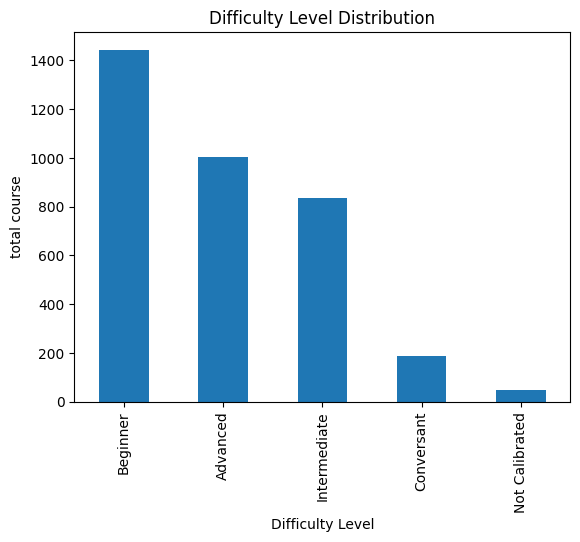

In [ ]:
# Distribusi kolom Difficulty Level
plt.title('Difficulty Level Distribution')
data['Difficulty Level'].value_counts().plot(kind='bar')
plt.ylabel('total course')
plt.show()

Dataset coursera ini memiliki sebagian besar course dengan difficulty beginner, tapi walaupun tidak seimbang, dengan jumlah nilai unik hanya 5, kemungkinan fitur ini punya potensi saat nantinya menjadi data latih model secara keseluruhan nantinya

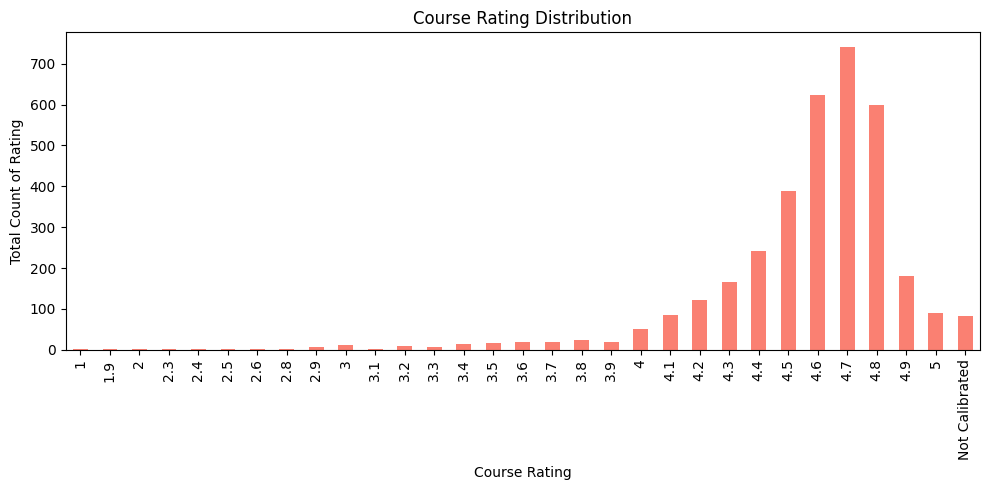

In [ ]:
# Distribusi Course Rating
rating_counts = data['Course Rating'].value_counts()
rating_counts = rating_counts.sort_index()

plt.figure(figsize=(10, 5))
rating_counts.plot(kind='bar', color='salmon')
plt.title('Course Rating Distribution')
plt.xlabel('Course Rating')
plt.ylabel('Total Count of Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Disini bisa dilihat dimana rating dengan value 'Not Calibrated' menggangu  plot distribusi rating

In [ ]:
datas = data.copy()
datas['Course Rating'] = datas['Course Rating'].replace('Not Calibrated', 0.0)
datas['Course Rating'] = pd.to_numeric(datas['Course Rating'], errors='coerce').fillna(0.0)

kata 'Not Calibrated' diubah menjadi 0 sebagai representasi suatu course belum bisa ditentukan ratingnya, nanti plot yang pake rating, kita pake variabel datas supaya urutan dan bisa lihat distribusi rating jadinya

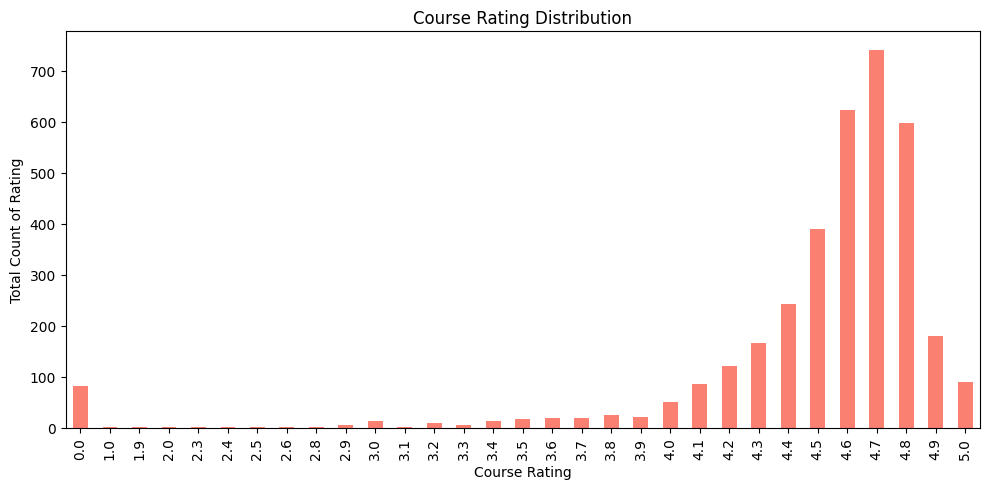

In [ ]:
# Distribusi Course Rating
rating_counts = datas['Course Rating'].value_counts()
rating_counts = rating_counts.sort_index()

plt.figure(figsize=(10, 5))
rating_counts.plot(kind='bar', color='salmon')
plt.title('Course Rating Distribution')
plt.xlabel('Course Rating')
plt.ylabel('Total Count of Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Pada plotting tersebut, rating menunjukan distribusi yang menonjol saat di rating sekitar 4 - 5, dimana ini menunjukan adanya Left-skewed (Condong ke kiri) yang berarti rata-rata orang yang melakukan rating hanya ketika puas, ketika tidak puas malah ga rating sama sekali sehingga dikit. Di sisi lain juga ada rating 0.0 yang harusnya ini bukan karena coursenya buruk tapi hanya belum ada rating saja, dan juga rating ini tidak memiliki hubungan dengan isi course sehingga kurang cocok dimasukan dalam data latih. Mungkin dijadikan fitur tambahan tanpa ikut campur proses latih.

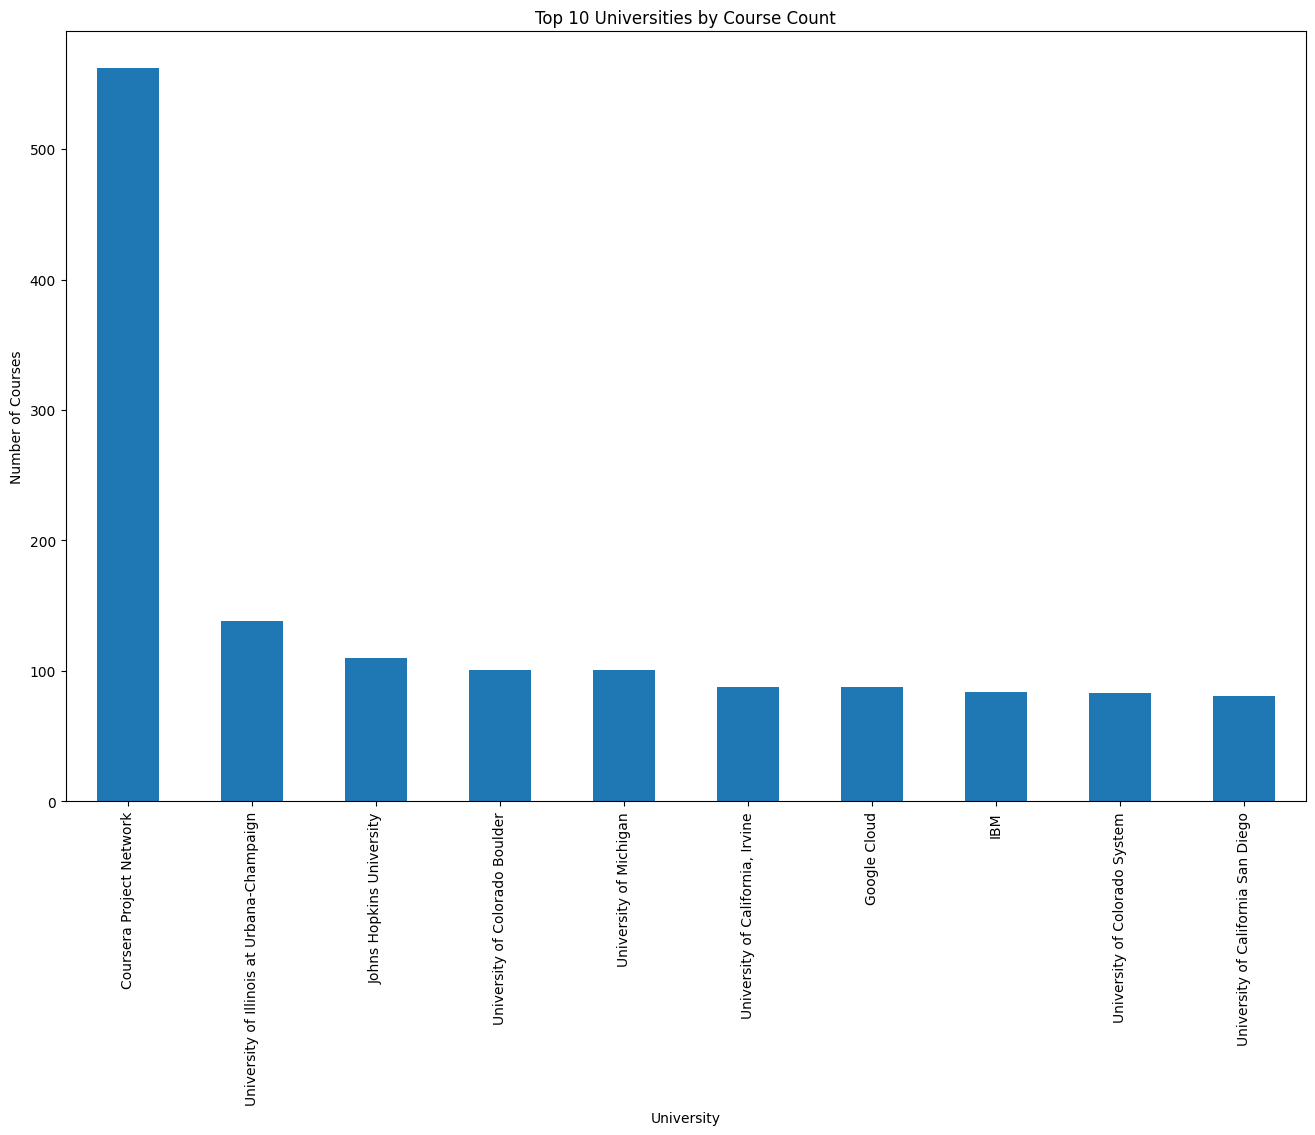

In [ ]:
# Top 10 Universitas yang paling banyak punya courses atau sudah publish courses
plt.figure(figsize=(16,10))
data['University'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Universities by Course Count")
plt.xlabel("University")
plt.ylabel("Number of Courses")
plt.xticks(rotation=90)
plt.show()

Di plottingan ini terlihat kalau universitas bernama Coursera Project Network memiliki course terbanyak diantara course dari universitas lain yang memiliki jumlah kursus yang relatif sama satu sama lain dan jauh lebih sedikit atau disebut distribusi yang sangat miring (long-tail distribution).

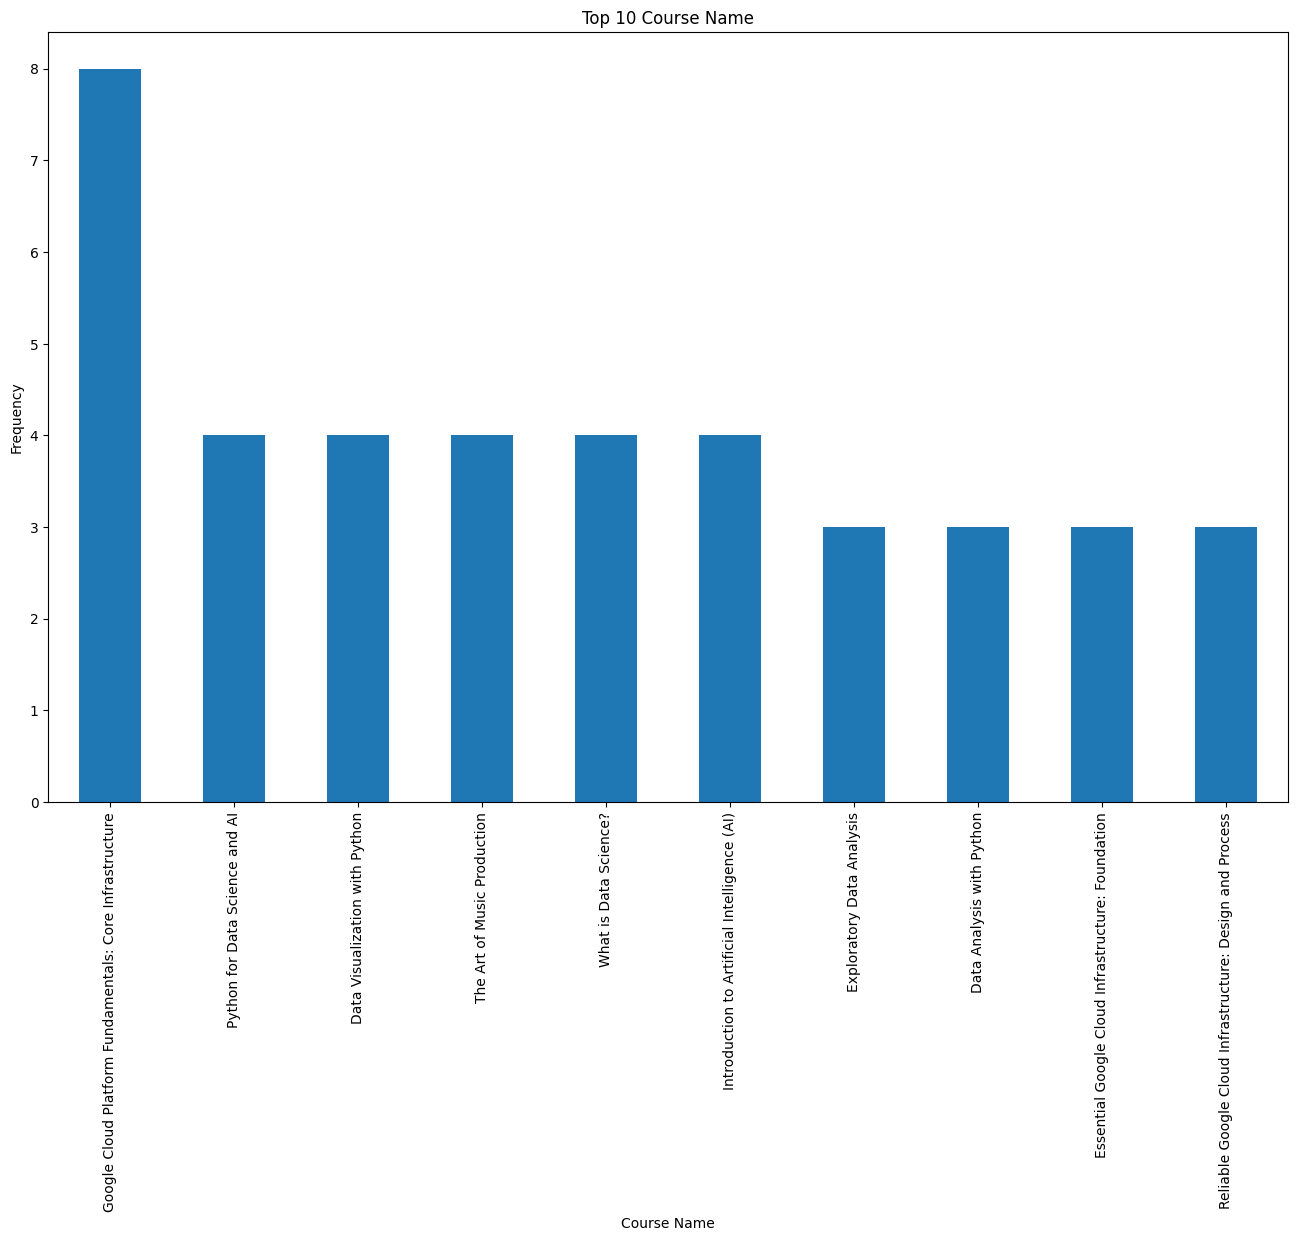

In [ ]:
# Top 10 Course Name dalam dataset
plt.figure(figsize=(16,10))
data['Course Name'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Course Name")
plt.xlabel("Course Name")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

Dari sini kita bisa melihat jumlah courses yang bernama "Google Cloud Platform Fundamentals: Core Infrastructure" yang terbanyak, namun selisihnya jumlah course name selanjutnya. Disini bisa dicek karena kemungkinan coursenya ada duplikasi atau memang beda versi. Lalu akan jadi kolom yang cukup menarik untuk dijadikan data latih model karena nama course biasa merepresentasikan suatu topik dan bisa berhubungan dengan topik pencarian user.

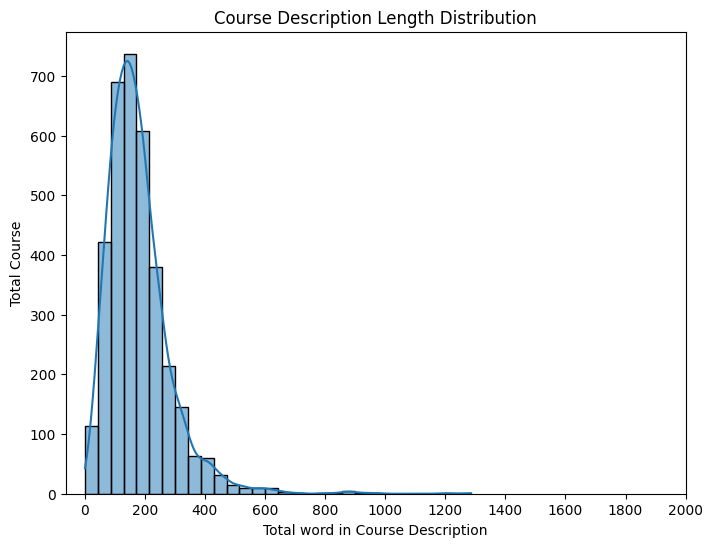

In [ ]:
# Distribusi kata di kolom course descriptiom
plt.figure(figsize=(8,6))
sns.histplot(data['Course Description'].str.split().apply(len), bins=30, kde=True)
plt.title('Course Description Length Distribution')
plt.xlabel('Total word in Course Description')
plt.ylabel('Total Course')
plt.xticks(ticks=np.arange(0, 2100, 200))
plt.show()

Dari plottingan ini, kita bisa lihat kalau panjang dari deskripsi setiap course cenderung padat dan singkat sekitar 100 - 300 kata, walau ada juga kasus khusus dimana panjangnya bisa lebih dari 900 tapi variasi ini bisa membantu model belajar variasi data melalui fitur ini.

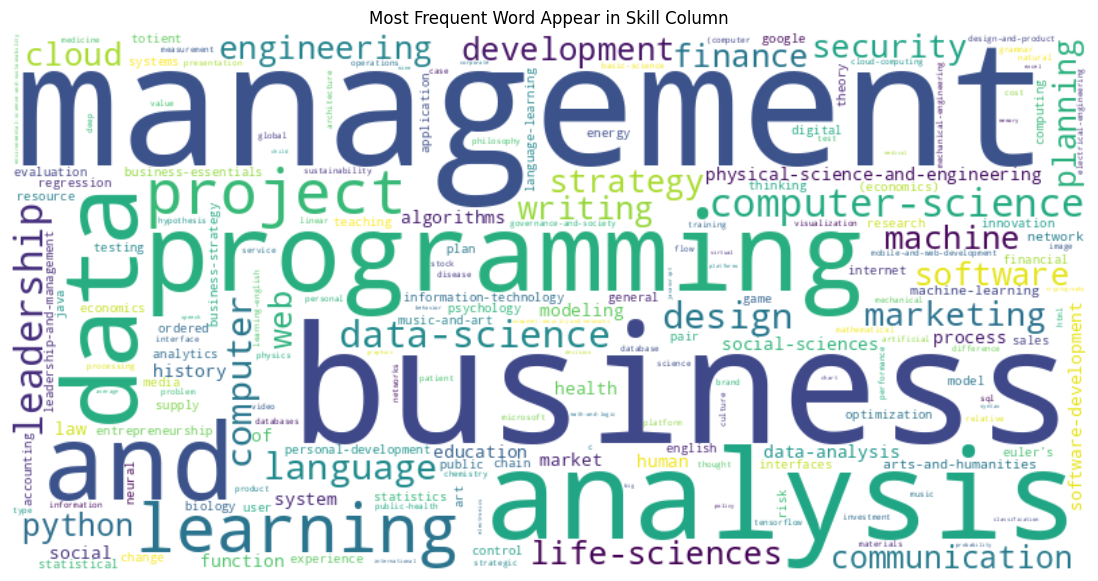

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Untuk melihat kata kunci yang sering muncul di kolom Skills
all_skills = ' '.join(data['Skills'].astype(str)).lower()
skill_list = all_skills.split()

skill_counts = Counter(skill_list)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(skill_counts)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Frequent Word Appear in Skill Column")
plt.axis('off')
plt.show()

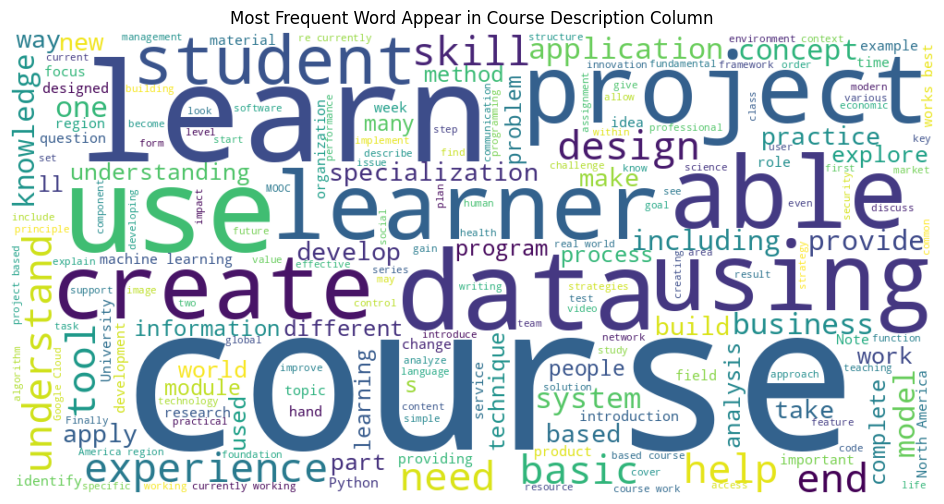

In [ ]:
from wordcloud import STOPWORDS

text = " ".join(data['Course Description'].dropna())
my_stopwords = STOPWORDS.copy()

custom_words = {"want", "well", "will"} # ilangin kata2 yang kira2 kurang sering di input
my_stopwords.update(custom_words)

wordcloud = WordCloud( width=1000, height=500, background_color='white', stopwords=my_stopwords).generate(text)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Frequent Word Appear in Course Description Column")
plt.axis('off')
plt.show()

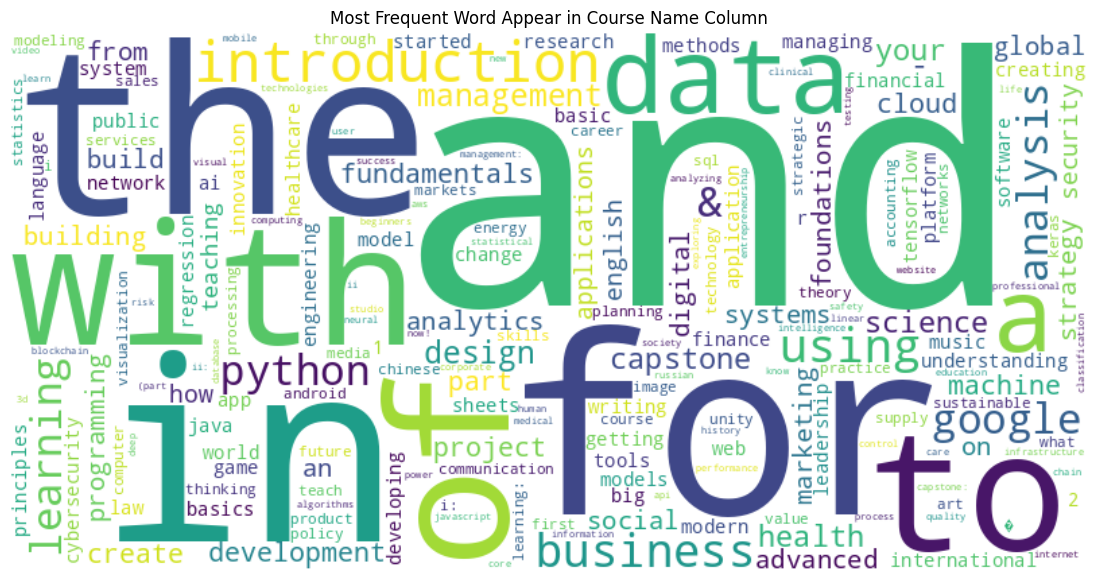

In [ ]:
# Melihat kata kunci yang sering muncul di course name
all_skills = ' '.join(data['Course Name'].astype(str)).lower()
skill_list = all_skills.split()

skill_counts = Counter(skill_list)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(skill_counts)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Frequent Word Appear in Course Name Column")
plt.axis('off')
plt.show()

Dari plottingan kata-kata dengan frekuensi tinggi dari kolom skill, deskripsi course dan course name ini, bisa dilihat banyak variasi kata kunci yang menarik dan cukup representatif sebagai topik atau deskripsi dari suatu course, kolom ini nantinya akan bisa menjadi bagian dari data latih yang cukup membantu model recommendation system nanti. Tapi disini kemunculan stopwords juga harus diperhatikan tidak boleh dibiarkan begitu saja saat training. Disisi lain, kolom bertipe data string yaitu University tidak saya liat frekuensi karena kurang merepresentasikan informasi course itu sendiri.

## Bivariate Analysis

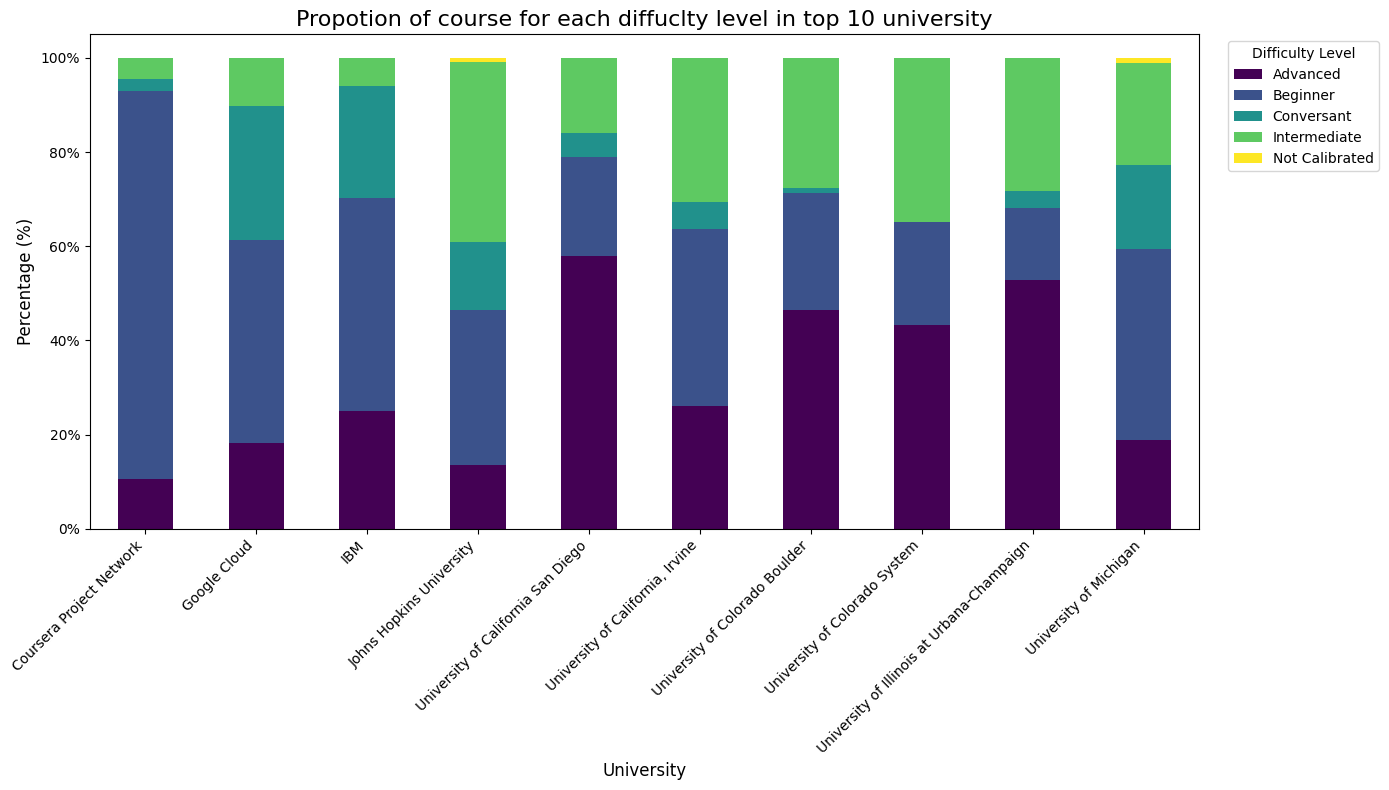

In [ ]:
from matplotlib.ticker import PercentFormatter

top_10_universities_list = datas['University'].value_counts().head(10).index.tolist()
subset_data = datas[datas['University'].isin(top_10_universities_list)]
crosstab_normalized = pd.crosstab(subset_data['University'], subset_data['Difficulty Level'], normalize='index')
crosstab_percent = crosstab_normalized * 100
ax = crosstab_percent.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Propotion of course for each diffuclty level in top 10 university', fontsize=16)
plt.xlabel('University', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
ax.yaxis.set_major_formatter(PercentFormatter())
plt.xticks(rotation=45, ha='right')
plt.legend(title='Difficulty Level', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

Dari plot ini, kita bisa melihat variasi presentase jumlah course per-difficult level dari 10 universitas, seperti coursera project memiliki course beginner paling banyak dari 9 lainnya, juga john hopkins memiliki course intermediate paling banyak dari 9 lainnya, variasi proporsi diffuclty level ini kemungkinan bisa menjadi insight baru dimana kolom ini bisa membantu model belajar pola data yang bervariasi ini untuk menjadi model recommendation system

# Data Preprocessing

In [ ]:
# check data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [ ]:
# no missing values

data.isnull().sum()

,0
Course Name,0
University,0
Difficulty Level,0
Course Rating,0
Course URL,0
Course Description,0
Skills,0


In [ ]:
# check if there is duplicate values in data

data.duplicated().sum()

np.int64(98)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
# check again

data.duplicated().sum()

np.int64(0)

In [ ]:
# tokenizing, removing stopwords, punctuation, and numbers, lemmatizing

eng_stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
punctuations = string.punctuation

def preprocess(text):
  sentence = sent_tokenize(text)
  clean_tokens = []

  for s in sentence:
    words = word_tokenize(s)

    for w in words:
      w = w.lower()

      if w not in eng_stopwords and w not in punctuations and w.isalpha():
        lemma = lemmatizer.lemmatize(w)
        clean_tokens.append(lemma)

  clean_text = ' '.join(clean_tokens)
  return clean_text

In [ ]:
# apply preprocess steps to main columns, then create keywords from those columns

data = data.copy()
data['Keywords'] = data['Course Name'].apply(preprocess) + " " + data['Difficulty Level'].apply(preprocess) + " " + data['Course Description'].apply(preprocess) + " " + data['Skills'].apply(preprocess)

data.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Keywords
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,write feature length screenplay film televisio...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,business strategy business model canvas analys...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,silicon thin film solar cell advanced course c...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,finance manager intermediate come number alway...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,retrieve data using sql query beginner course ...


In [ ]:
data.shape

(3424, 8)

In [ ]:
# text vectorization using tfidf

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Keywords'])
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 275014 stored elements and shape (3424, 16905)>

# Model

## Pendekatan 1: K-Means Clustering + Cosine Similarity

In [ ]:
# modelling

inertia = []
silhouette = []
n_k = range(2, 51)

# find best k using elbow method
for k in n_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    inertia.append(kmeans.inertia_)

    score = silhouette_score(X, kmeans.labels_)
    silhouette.append(score)

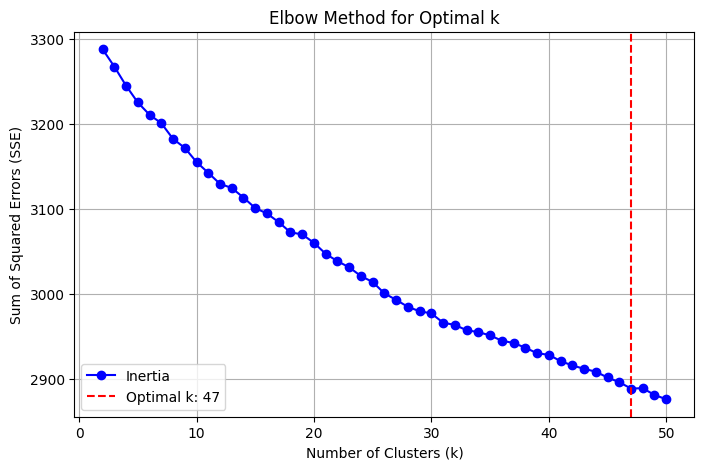

In [ ]:
# plotting elbow
plt.figure(figsize=(8, 5))
plt.plot(n_k, inertia, 'bo-', label='Inertia')
plt.axvline(x=47, color='r', linestyle='--', label=f'Optimal k: {47}')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.grid(True)
plt.show()

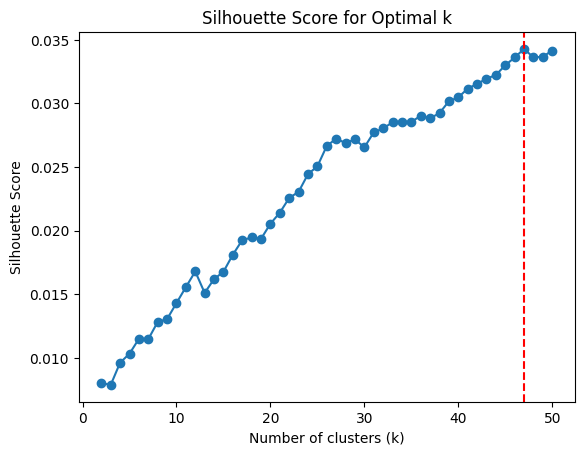

In [ ]:
# plot silhouette scores
plt.plot(n_k, silhouette, marker='o')
plt.axvline(x=47, color='r', linestyle='--', label=f'Optimal k: {47}')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

Berdasarkan Elbow Method dan Silhouette Score, didapat bahwa nilai k yang paling optimal adalah 47.

In [ ]:
# final model

model = KMeans(n_clusters=47, random_state=42)
model.fit(X)

KMeans(n_clusters=47, random_state=42)

In [ ]:
# save model

import pickle
file = open("kmean.pickle", "wb")
pickle.dump(model, file)
file.close()

In [ ]:
# add cluster to main df

data['Cluster'] = model.labels_
data.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Keywords,Cluster
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,write feature length screenplay film televisio...,31
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,business strategy business model canvas analys...,14
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,silicon thin film solar cell advanced course c...,6
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,finance manager intermediate come number alway...,10
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,retrieve data using sql query beginner course ...,26


In [ ]:
# recommendation function pendekatan 1

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

def recommend_course_1(user_input, top_n=5):

    input_vector = vectorizer.transform([user_input])

    similarities = cosine_similarity(input_vector, X).flatten()

    # get most similar course index
    best_match_idx = similarities.argmax()
    best_match_course = data.iloc[best_match_idx]
    best_cluster = best_match_course['Cluster']

    # get all courses in best cluster
    cluster_mask = data['Cluster'] == best_cluster
    cluster_data = data[cluster_mask].copy()

    # recalc similarity among all courses in best cluster
    cluster_tfidf = X[cluster_mask.values]
    cluster_sim = cosine_similarity(input_vector, cluster_tfidf).flatten()

    cluster_data['similarity'] = cluster_sim

    # sort and get top N
    recommendations = cluster_data.sort_values(by='similarity', ascending=False).head(top_n)

    return recommendations

In [ ]:
# test recommendations
recs = recommend_course_1("deep learning with python", top_n=5)
recs

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Keywords,Cluster,similarity
1998,AI Capstone Project with Deep Learning,IBM,Beginner,4.2,https://www.coursera.org/learn/ai-deep-learnin...,"In this capstone, learners will apply their de...",modeling Deep Learning Apache Spark Tensorf...,ai capstone project deep learning beginner cap...,19,0.617839
991,Neural Networks and Deep Learning,DeepLearning.AI,Beginner,4.9,https://www.coursera.org/learn/neural-networks...,"If you want to break into cutting-edge AI, thi...",Deep Learning Regression Human Learning Bac...,neural network deep learning beginner want bre...,19,0.587195
2711,Introduction to Deep Learning & Neural Network...,IBM,Beginner,4.7,https://www.coursera.org/learn/introduction-to...,Looking to start a career in Deep Learning? Lo...,recurrent neural network Artificial Neural Ne...,introduction deep learning neural network kera...,19,0.566400
1943,An Introduction to Practical Deep Learning,Intel,Intermediate,4.2,https://www.coursera.org/learn/intro-practical...,This course provides an introduction to Deep L...,Human Learning Algorithms Long Short-Term Me...,introduction practical deep learning intermedi...,19,0.495099
1208,Deep Neural Networks with PyTorch,IBM,Beginner,4.3,https://www.coursera.org/learn/deep-neural-net...,The course will teach you how to develop deep ...,Deep Learning Gradient stochastic Convoluti...,deep neural network pytorch beginner course te...,19,0.448734


In [ ]:
# view cluster 10
cluster_10 = data.loc[data['Cluster'] == 10, :]
cluster_10.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Keywords,Cluster
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,finance manager intermediate come number alway...,10
116,FinTech Foundations and Overview,The Hong Kong University of Science and Techno...,Intermediate,4.7,https://www.coursera.org/learn/fintech,Our primary goal is to help you to understand ...,financial services Finance financial service...,fintech foundation overview intermediate prima...,10
120,"Risk, Return & Valuation",University of Michigan,Beginner,4.8,https://www.coursera.org/learn/risk-return-and...,This course is an introduction to the notion o...,relative change and difference Correlation An...,risk return valuation beginner course introduc...,10
179,Portfolio Optimization using Markowitz Model,Coursera Project Network,Beginner,4.5,https://www.coursera.org/learn/portfolio-optim...,"In this 1-hour long project-based course, you ...",Machine Learning Microsoft Excel securities ...,portfolio optimization using markowitz model b...,10
197,"Fundamentals of Business Finance, with Goldman...",Goldman Sachs,Beginner,4.6,https://www.coursera.org/learn/10k-women-2,This course is one of 10 courses available in ...,Cost Accounting Accounting Finance income ...,fundamental business finance goldman sachs wom...,10


In [ ]:
# get sample course
test_course = data.sample(1)
test_course

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Keywords,Cluster
2169,Social Science Approaches to the Study of Chin...,The Hong Kong University of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/social-science-...,This course seeks to turn learners into inform...,relative change and difference inference Exp...,social science approach study chinese society ...,36


In [ ]:
# test recommendations
recs = recommend_course_1("machine learning", top_n=5)
recs

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Keywords,Cluster,similarity
2538,Introduction to Applied Machine Learning,Alberta Machine Intelligence Institute,Intermediate,4.7,https://www.coursera.org/learn/machine-learnin...,This course is for professionals who have hear...,Algorithms Machine Learning Algorithms Appli...,introduction applied machine learning intermed...,19,0.791041
3230,Machine Learning for All,University of London,Conversant,4.7,https://www.coursera.org/learn/uol-machine-lea...,"Machine Learning, often called Artificial Inte...",robotics Machine Learning Artificial Neural ...,machine learning conversant machine learning o...,19,0.616829
3471,Optimizing Machine Learning Performance,Alberta Machine Intelligence Institute,Beginner,4.5,https://www.coursera.org/learn/optimize-machin...,This course synthesizes everything your have l...,project Deep Learning Strategy mathematical...,optimizing machine learning performance beginn...,19,0.595861
287,Developing AI Applications on Azure,LearnQuest,Beginner,4.3,https://www.coursera.org/learn/developing-ai-a...,This course introduces the concepts of Artific...,Machine Learning web service workspace Trai...,developing ai application azure beginner cours...,19,0.569636
615,Structuring Machine Learning Projects,DeepLearning.AI,Beginner,4.8,https://www.coursera.org/learn/machine-learnin...,You will learn how to build a successful machi...,bias Human Learning analysis computer multi...,structuring machine learning project beginner ...,19,0.515572


In [ ]:
# test recommendations
recs = recommend_course_1("mobile app development", top_n=5)
recs

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Keywords,Cluster,similarity
2688,Build a mobile app with Google Sheets on Glide...,Coursera Project Network,Beginner,4.5,https://www.coursera.org/learn/build-a-mobile-...,"In this 2-hour long project-based course, you ...",Accounting blogging mobile app page layout ...,build mobile app google sheet glide coding beg...,4,0.568138
2828,Creating an Interactive Story with Flutter,Coursera Project Network,Beginner,3.9,https://www.coursera.org/learn/story-creating-...,"In this 1-hour long project-based course, you ...",language Mobile Development Computer Program...,creating interactive story flutter beginner lo...,4,0.196111
2834,Getting Started with ASP.NET Core Razor Pages,Coursera Project Network,Beginner,3.7,https://www.coursera.org/learn/getting-started...,"In this 1-hour long project-based course, you ...",recursively enumerable set web application a...,getting started core razor page beginner long ...,4,0.102517
2680,Build local development environments using Doc...,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/build-local-dev...,"By the end of this project, you will create tw...",Web Development deployment environment Kuber...,build local development environment using dock...,4,0.079216
2435,Collaborate on Files in Slack: Local & Google ...,Coursera Project Network,Intermediate,5,https://www.coursera.org/learn/collaborate-fil...,"By the end of this project, you will maximize ...",organizational communication archive file Cl...,collaborate file slack local google drive inte...,4,0.054144


In [ ]:
# save clustering result
data.to_csv('coursera_output.csv', index=False)

## Pendekatan 2: K-Means Clustering + KNN + Cosine Similarity (Final)

k=3: accuracy = 74.31%
k=4: accuracy = 74.16%
k=5: accuracy = 75.62%
k=6: accuracy = 76.50%
k=7: accuracy = 77.08%
k=8: accuracy = 77.96%
k=9: accuracy = 78.83%
k=10: accuracy = 79.42%
k=11: accuracy = 79.42%
k=12: accuracy = 78.98%
k=13: accuracy = 79.12%
k=14: accuracy = 78.83%
k=15: accuracy = 78.39%
k=16: accuracy = 78.39%
k=17: accuracy = 78.69%
k=18: accuracy = 78.54%
k=19: accuracy = 79.12%
k=20: accuracy = 79.42%
k=21: accuracy = 79.12%
k=22: accuracy = 79.42%
k=23: accuracy = 79.42%
k=24: accuracy = 79.27%
k=25: accuracy = 79.27%
k=26: accuracy = 78.98%
k=27: accuracy = 79.12%
k=28: accuracy = 79.42%
k=29: accuracy = 79.85%
k=30: accuracy = 79.27%
k=31: accuracy = 79.71%
k=32: accuracy = 79.85%
k=33: accuracy = 80.15%
k=34: accuracy = 79.42%
k=35: accuracy = 79.42%
k=36: accuracy = 79.12%
k=37: accuracy = 78.98%
k=38: accuracy = 78.98%
k=39: accuracy = 78.83%
k=40: accuracy = 77.96%
k=41: accuracy = 78.10%
k=42: accuracy = 78.25%
k=43: accuracy = 77.81%
k=44: accuracy = 78.10%

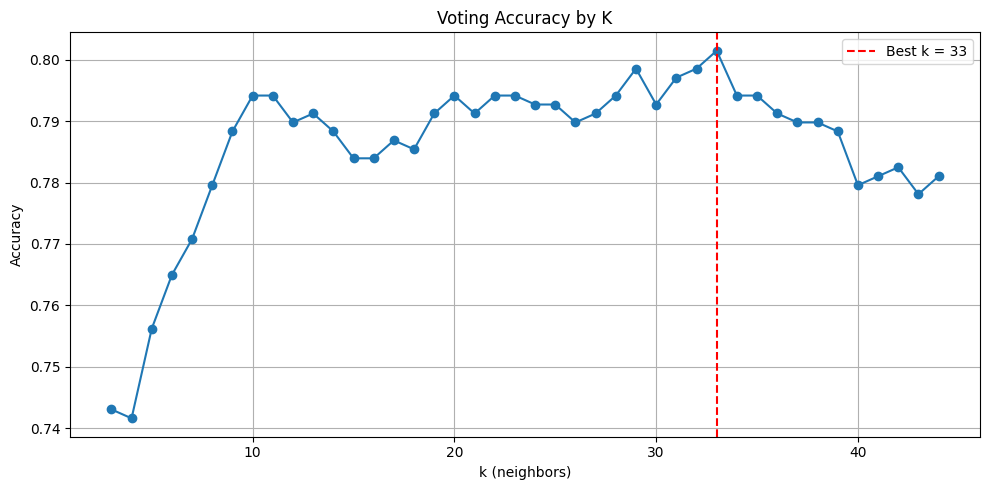


Best k = 33 with accuracy = 80.15%


In [ ]:
# menentukan k terbaik untuk k-NN dengan menggunakan k yang paling akurat memprediksi cluster test data (data sama yang digunakan untuk training kmeans, tapi disini di split untuk knn)
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# handling kolom rating yang valuenya belum float
def safe_float(x):
    try:
        if pd.isna(x) or x == '' or str(x).lower() in ['not calibrated', 'n/a', 'none']:
            return 0.0
        return round(float(x), 1)
    except:
        return 0.0

d = pd.read_csv('coursera_output.csv', encoding='utf-8')
txt_cols = ['Course Name', 'University', 'Course Description', 'Skills']
for col in txt_cols:
    if col in d.columns:
        d[col] = d[col].astype(str).str.replace(r'\?', "'", regex=True)\
                                     .str.replace(r"\'", "'", regex=True)\
                                     .str.replace(r"\\", "", regex=True)

# failsafe
if 'Course Rating' in d.columns:
    d['Course Rating'] = d['Course Rating'].apply(safe_float)

if 'Keywords' not in d.columns:
    d['Keywords'] = (
        d['Course Name'].apply(preprocess) + ' ' +
        d['Difficulty Level'].apply(preprocess) + ' ' +
        d['Course Description'].apply(preprocess) + ' ' +
        d['Skills'].apply(preprocess)
    )

if 'Cluster' not in d.columns:
    raise ValueError("Missing 'Cluster' column required for evaluation")

d = d.dropna(subset=['Cluster'])

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(d['Keywords'])

# split data ke test dan train
X_train, X_test, y_train, y_test = train_test_split(X, d['Cluster'], test_size=0.2, random_state=42)
d_train = d.iloc[y_train.index]
d_test = d.iloc[y_test.index]


# weighted voting
def vote_predict(knn_model, query_vector, k, X_matrix, df):
    # mengambil index k-neighbour terdekat dan distancenya
    distances, indices = knn_model.kneighbors(query_vector, n_neighbors=k)
    neighbor_courses = df.iloc[indices.flatten()]
    neighbor_clusters = neighbor_courses['Cluster'].tolist()

    # mengubah cosine distance ke bentuk cosine similarity
    weights = 1 - distances.flatten()
    votes = {}

    # mengumpulkan weight masing masing vote
    for i, cluster in enumerate(neighbor_clusters):
        votes[cluster] = votes.get(cluster, 0) + weights[i]

    if not votes:
        return None

    # return winning vote
    return max(votes, key=votes.get)

k_values = list(range(3, min(45, len(d_train)), 1))
accuracies = []

# nyoba k dari 1-45
for k in k_values:
    knn = NearestNeighbors(n_neighbors=k, metric='cosine', algorithm='brute')
    knn.fit(X_train)

    correct = 0
    # hitung berapa benar / accuracy prediksi sesuai label yang udh ditentukan kmean
    for idx, vec in enumerate(X_test):
        actual = y_test.iloc[idx]
        vec = X_test[idx]
        pred = vote_predict(knn, vec, k, X_train, d_train)
        if pred == actual:
            correct += 1

    accuracy = correct / len(y_test)
    accuracies.append(accuracy)
    print(f"k={k}: accuracy = {accuracy:.2%}")

plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
best_k = k_values[np.argmax(accuracies)]
plt.axvline(best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.title("Voting Accuracy by K")
plt.xlabel("k (neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nBest k = {best_k} with accuracy = {max(accuracies):.2%}")

In [ ]:
# recommendation function pendekatan 2
import os
def recommend_course_2(user_input, k=33, top_n=5):
    input_vector = vectorizer.transform([user_input])
    knn_path = 'knn_model.pickle'

    # jika model udah ada load saja
    if os.path.exists(knn_path):
        with open(knn_path, 'rb') as f:
            knn_model = pickle.load(f)
    else:
        knn_model = NearestNeighbors(n_neighbors=k, metric='cosine')
        knn_model.fit(X)
        with open(knn_path, 'wb') as f:
            pickle.dump(knn_model, f)

    # bagian seperti tadi:
    # mengambil k-neighbour terdekat (k==33)
    distances, indices = knn_model.kneighbors(input_vector)
    neighbor_courses = d.iloc[indices.flatten()]
    neighbor_clusters = neighbor_courses['Cluster'].tolist()

    # cosine distance -> cosine similarity
    weights = 1 - distances.flatten()

    votes = {}
    # weighted voting
    for i, cluster in enumerate(neighbor_clusters):
        votes[cluster] = votes.get(cluster, 0) + weights[i]

    if not votes:
        return pd.DataFrame()

    pred_cluster = max(votes, key=votes.get)

    # mengambil semua data dengan cluster terprediksi
    mask = (d['Cluster'] == pred_cluster).to_numpy()
    cluster_data = d[mask].copy()
    cluster_tfidf = X[mask]

    # membandingkan query dengan semua data di cluster yang sama
    cluster_sim = cosine_similarity(input_vector, cluster_tfidf).flatten()
    cluster_data['similarity'] = cluster_sim

    # return top_n tertinggi yang paling mirip
    return cluster_data.sort_values(by='similarity', ascending=False).head(top_n)

In [ ]:
# test recommendations
recs = recommend_course_2("deep learning with python", top_n=5)
recs

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Keywords,Cluster,similarity
1948,AI Capstone Project with Deep Learning,IBM,Beginner,4.2,https://www.coursera.org/learn/ai-deep-learnin...,"In this capstone, learners will apply their de...",modeling Deep Learning Apache Spark Tensorf...,ai capstone project deep learning beginner cap...,19,0.618372
969,Neural Networks and Deep Learning,DeepLearning.AI,Beginner,4.9,https://www.coursera.org/learn/neural-networks...,"If you want to break into cutting-edge AI, thi...",Deep Learning Regression Human Learning Bac...,neural network deep learning beginner want bre...,19,0.608083
2645,Introduction to Deep Learning & Neural Network...,IBM,Beginner,4.7,https://www.coursera.org/learn/introduction-to...,Looking to start a career in Deep Learning' Lo...,recurrent neural network Artificial Neural Ne...,introduction deep learning neural network kera...,19,0.572150
1893,An Introduction to Practical Deep Learning,Intel,Intermediate,4.2,https://www.coursera.org/learn/intro-practical...,This course provides an introduction to Deep L...,Human Learning Algorithms Long Short-Term Me...,introduction practical deep learning intermedi...,19,0.523187
1180,Deep Neural Networks with PyTorch,IBM,Beginner,4.3,https://www.coursera.org/learn/deep-neural-net...,The course will teach you how to develop deep ...,Deep Learning Gradient stochastic Convoluti...,deep neural network pytorch beginner course te...,19,0.453989


In [ ]:
# test recommendations
recs = recommend_course_2("machine learning", top_n=5)
recs

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Keywords,Cluster,similarity
2538,Introduction to Applied Machine Learning,Alberta Machine Intelligence Institute,Intermediate,4.7,https://www.coursera.org/learn/machine-learnin...,This course is for professionals who have hear...,Algorithms Machine Learning Algorithms Appli...,introduction applied machine learning intermed...,19,0.803769
3230,Machine Learning for All,University of London,Conversant,4.7,https://www.coursera.org/learn/uol-machine-lea...,"Machine Learning, often called Artificial Inte...",robotics Machine Learning Artificial Neural ...,machine learning conversant machine learning o...,19,0.651195
3471,Optimizing Machine Learning Performance,Alberta Machine Intelligence Institute,Beginner,4.5,https://www.coursera.org/learn/optimize-machin...,This course synthesizes everything your have l...,project Deep Learning Strategy mathematical...,optimizing machine learning performance beginn...,19,0.625384
287,Developing AI Applications on Azure,LearnQuest,Beginner,4.3,https://www.coursera.org/learn/developing-ai-a...,This course introduces the concepts of Artific...,Machine Learning web service workspace Trai...,developing ai application azure beginner cours...,19,0.574831
615,Structuring Machine Learning Projects,DeepLearning.AI,Beginner,4.8,https://www.coursera.org/learn/machine-learnin...,You will learn how to build a successful machi...,bias Human Learning analysis computer multi...,structuring machine learning project beginner ...,19,0.551830


In [ ]:
# test recommendations
recs = recommend_course_2("mobile app development", top_n=5)
recs

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Keywords,Cluster,similarity
2826,Programming Mobile Applications for Android Ha...,"University of Maryland, College Park",Intermediate,4.5,https://www.coursera.org/learn/android-program...,This course introduces you to the design and i...,user interface software Computer Programming...,programming mobile application android handhel...,23,0.463136
3049,Build an App in Android Studio using Activities,Coursera Project Network,Beginner,4.4,https://www.coursera.org/learn/build-an-app-in...,In this project you will create an Android app...,kivy Application Design xml xamarin Google...,build app android studio using activity beginn...,23,0.402139
2754,Build an App in Android Studio using onTouch,Coursera Project Network,Beginner,4.5,https://www.coursera.org/learn/build-an-app-in...,In this project you will build an Android app ...,drop-down list ordered pair Data Analysis B...,build app android studio using ontouch beginne...,23,0.363098
1911,Build an App in Android Studio using Read-Write,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/build-an-app-in...,In this project you will build an Android app ...,resource arrays saving ordered pair intern...,build app android studio using beginner projec...,23,0.357213
2469,Build an App in Android Studio using Resources,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/build-an-app-in...,In this project you will build an Android app ...,android studio java (software platform) uplo...,build app android studio using resource beginn...,23,0.349728


## Compare Pendekatan 1 dan 2

1. Input: "machine learning and data analysis with python"
   - Pendekatan 1 Avg Similarity: 0.4576
   - Pendekatan 2 Avg Similarity: 0.5137

2. Input: "how to study english and other languages"
   - Pendekatan 1 Avg Similarity: 0.4394
   - Pendekatan 2 Avg Similarity: 0.4394

3. Input: "financial markets and investment analysis"
   - Pendekatan 1 Avg Similarity: 0.4719
   - Pendekatan 2 Avg Similarity: 0.4719

4. Input: "deep learning for image recognition"
   - Pendekatan 1 Avg Similarity: 0.4553
   - Pendekatan 2 Avg Similarity: 0.4553

5. Input: "learn animation for beginners"
   - Pendekatan 1 Avg Similarity: 0.3413
   - Pendekatan 2 Avg Similarity: 0.3413

6. Input: "calculus tips"
   - Pendekatan 1 Avg Similarity: 0.3968
   - Pendekatan 2 Avg Similarity: 0.3968

7. Input: "music and arts for advanced learners"
   - Pendekatan 1 Avg Similarity: 0.6833
   - Pendekatan 2 Avg Similarity: 0.6833

8. Input: "mobile app development"
   - Pendekatan 1 Avg Similarity: 0.2327
   - Pendeka

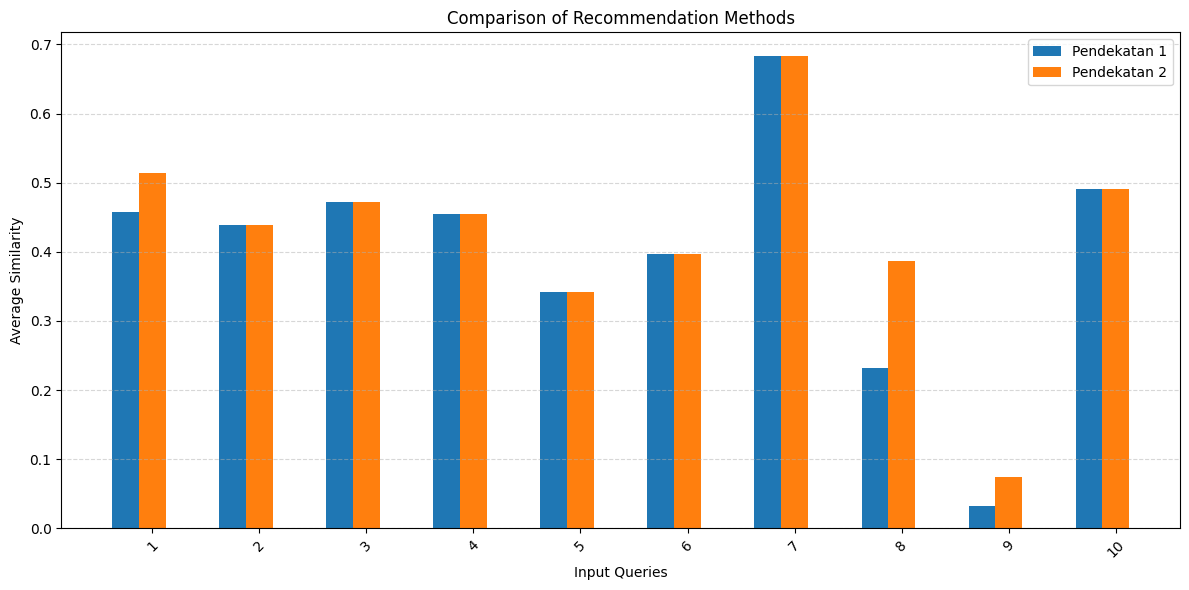

In [ ]:
def compare_similarity_batch(inputs, top_n=5, plot=True):
    total_sim_cosine = 0
    total_sim_knn = 0

    cosine_scores = []
    knn_scores = []

    for i, user_input in enumerate(inputs, 1):
        vec_input = vectorizer.transform([user_input])

        rec1 = recommend_course_1(user_input, top_n=top_n)
        sim1 = cosine_similarity(vec_input, vectorizer.transform(rec1['Keywords'].tolist())).flatten().mean()

        rec2 = recommend_course_2(user_input, top_n=top_n)
        sim2 = cosine_similarity(vec_input, vectorizer.transform(rec2['Keywords'].tolist())).flatten().mean()

        total_sim_cosine += sim1
        total_sim_knn += sim2

        cosine_scores.append(sim1)
        knn_scores.append(sim2)

        print(f"{i}. Input: \"{user_input}\"")
        print(f"   - Pendekatan 1 Avg Similarity: {sim1:.4f}")
        print(f"   - Pendekatan 2 Avg Similarity: {sim2:.4f}\n")

    n = len(inputs)
    print("\n=== Overall Results ===")
    print(f"Overall Avg Pendekatan 1: {total_sim_cosine / n:.4f}")
    print(f"Overall Avg Pendekatan 2: {total_sim_knn / n:.4f}\n")

    if plot:
        x = np.arange(len(inputs))
        width = 0.25

        plt.figure(figsize=(12, 6))
        plt.bar(x - width, cosine_scores, width, label='Pendekatan 1')
        plt.bar(x, knn_scores, width, label='Pendekatan 2')

        plt.xlabel("Input Queries")
        plt.ylabel("Average Similarity")
        plt.title("Comparison of Recommendation Methods")
        plt.xticks(x, [f"{i+1}" for i in range(len(inputs))], rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.grid(True, axis='y', linestyle='--', alpha=0.5)
        plt.show()

test_inputs = [
    "machine learning and data analysis with python",
    "how to study english and other languages",
    "financial markets and investment analysis",
    "deep learning for image recognition",
    "learn animation for beginners",
    "calculus tips",
    "music and arts for advanced learners",
    "mobile app development",
    "geography books",
    "cloud computing and devops engineering"
]

compare_similarity_batch(test_inputs, top_n=5)

Dapat disimpulkan pendekatan 2 performanya lebih baik dibandingkan pendekatan 1. Maka, untuk deployment kita gunakan pendekatan